# Student Habits vs Academic Performance
Authors: 
- Christopher Tangonan
- Edward Torres
- Guillermo Zendejas
- Victoria Ramirez


### Introduction
Students usually have busy lives while enrolled in school. Many of their habits can affect their perfomances in their classes, espeically when taking an exam in any of their classes. In this project, we will look to determine a relationship between a student’s habits and possibly predict their exam score based on those habits. Habits, such as a student's sleep hours, study time, attendance percentage, exercise frequency, and extracurricular participation, will be analzyed. We will be using the “Student Habits vs Academic Performance” dataset from Kaggle. First, we’ll load and clean the data in pandas (check for nulls, basic sanity checks), then explore relationships with matplotlib (histograms, scatterplots, correlation). As we complete additional class modules on data wrangling, kNN, and linear regression, we expect to use additional methods to further analyze our data to predict student performance. We will interpret the results to answer our question about the relationship between the students' habits and their final score performance.

### Dataset 
We will be using the “Student Habits vs Academic Performance” dataset which was obtained from Kaggle. It was downloaded on May 25th at 7:30 pm and the last update was about a month before we downloaded it. The author of the data is Jayantha Nath. It is simulated data with 1000 synthetic student records. There are a total of 1000 rows and 16 columns. Each student is provided with a student ID, age, and gender to identify them in columns 0, 1, and 2. Columns 3 through 14 represent the habits that students can partake in that can affect their exam scores. These habits range from hours studying to the number of hours they spend watching Netflix.  Exam scores are given in the last column.

See below for a quick overview of the dataset. 

In [1]:

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [2]:
# read database
df = pd.read_csv("./src/student_habits_performance.csv", index_col=0)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

## Pre-processing and Cleaning the Data

In [3]:
df_nums = df.select_dtypes(include='number')
df_cats = df.select_dtypes(exclude='number')
# check for missing values
print(f'Missing values check:\n{df_nums.isnull().sum()}')
# check for duplicates
print(f'Duplicate check:\n{df_nums.duplicated().sum()}')
# check for outliers
print(f'Outliers check:\n{df_nums.apply(lambda x: np.abs(x - x.mean()) > (3 * x.std())).sum()}')
# check for unique values in categorical columns
print(f'Unique values check:\n{df_cats.apply(lambda x: x.unique()).head(10)}')

Missing values check:
age                      0
study_hours_per_day      0
social_media_hours       0
netflix_hours            0
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               0
dtype: int64
Duplicate check:
0
Outliers check:
age                      0
study_hours_per_day      2
social_media_hours       3
netflix_hours            2
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               1
dtype: int64
Unique values check:
gender                                          [Female, Male, Other]
part_time_job                                               [No, Yes]
diet_quality                                       [Fair, Good, Poor]
parental_education_level         [Master, High School, Bachelor, nan]
internet_quality                                [Average, Poor, Good]
extracurricular_participation                               

## Understanding the Numerical Data


### Predictions and Predictors
As stated before, our goal is to use this dataset to predict a student's exam score based on their habit. Based on the visualizations below, we are using the following as our predictors for exam scores: 

- attendance_percentage
- study_hours_per_day
- mental_health_rating
- exercise_frequency
- sleep_hours
- netflix_hours
- social_media_hours
- part_time_job
- internet_quality

These predictors were chosen due to their positive and negative correlation to the target, exam_score. See below for visualations for all possible predictor and how they relate to each other.   

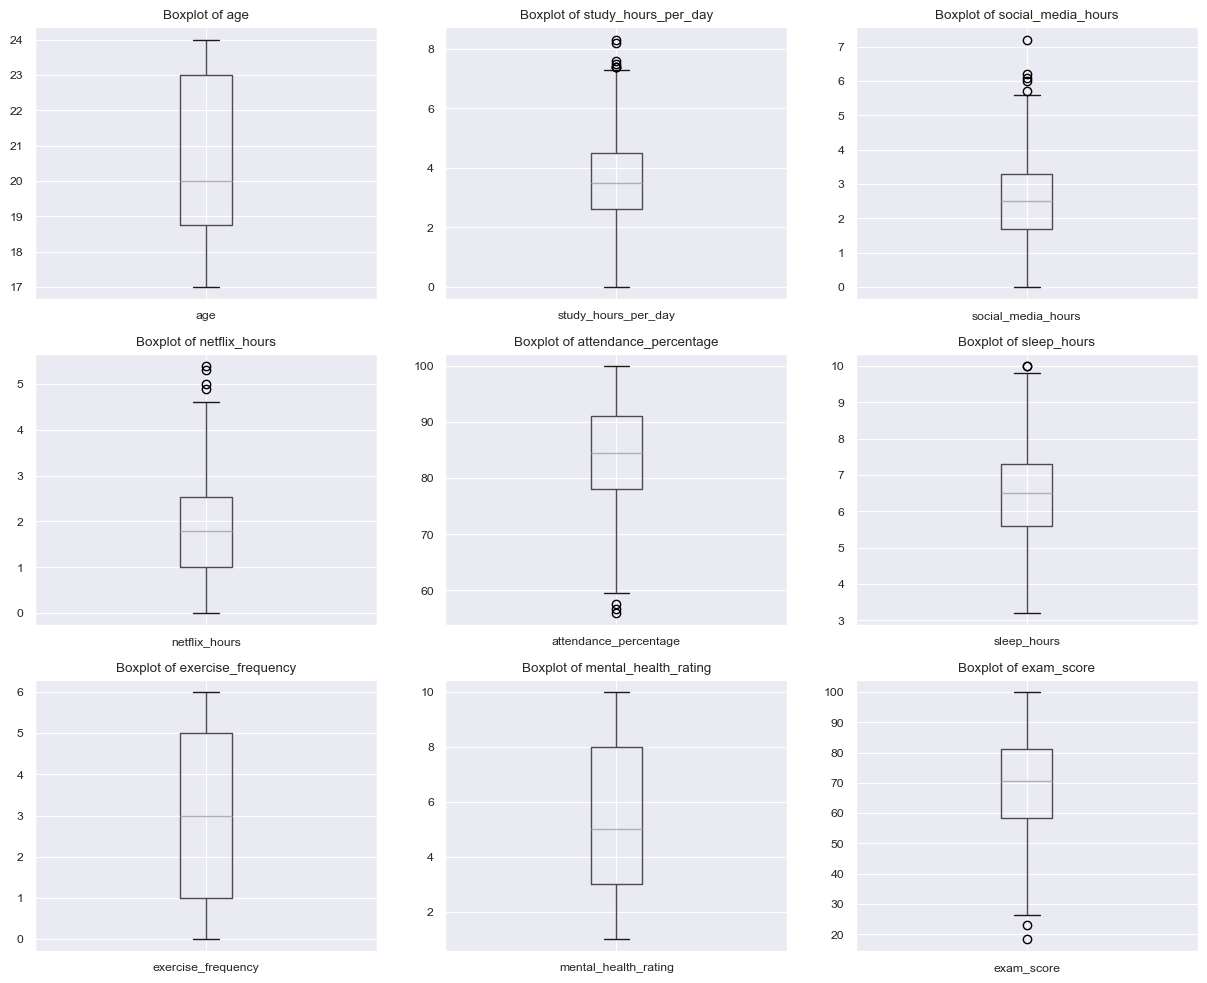

In [4]:
n_cols = 3
n_total = len(df_nums.columns)
n_rows = math.ceil(n_total/n_cols)
# create boxplots for each numeric column
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_nums.columns):
    df_nums.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
plt.show()

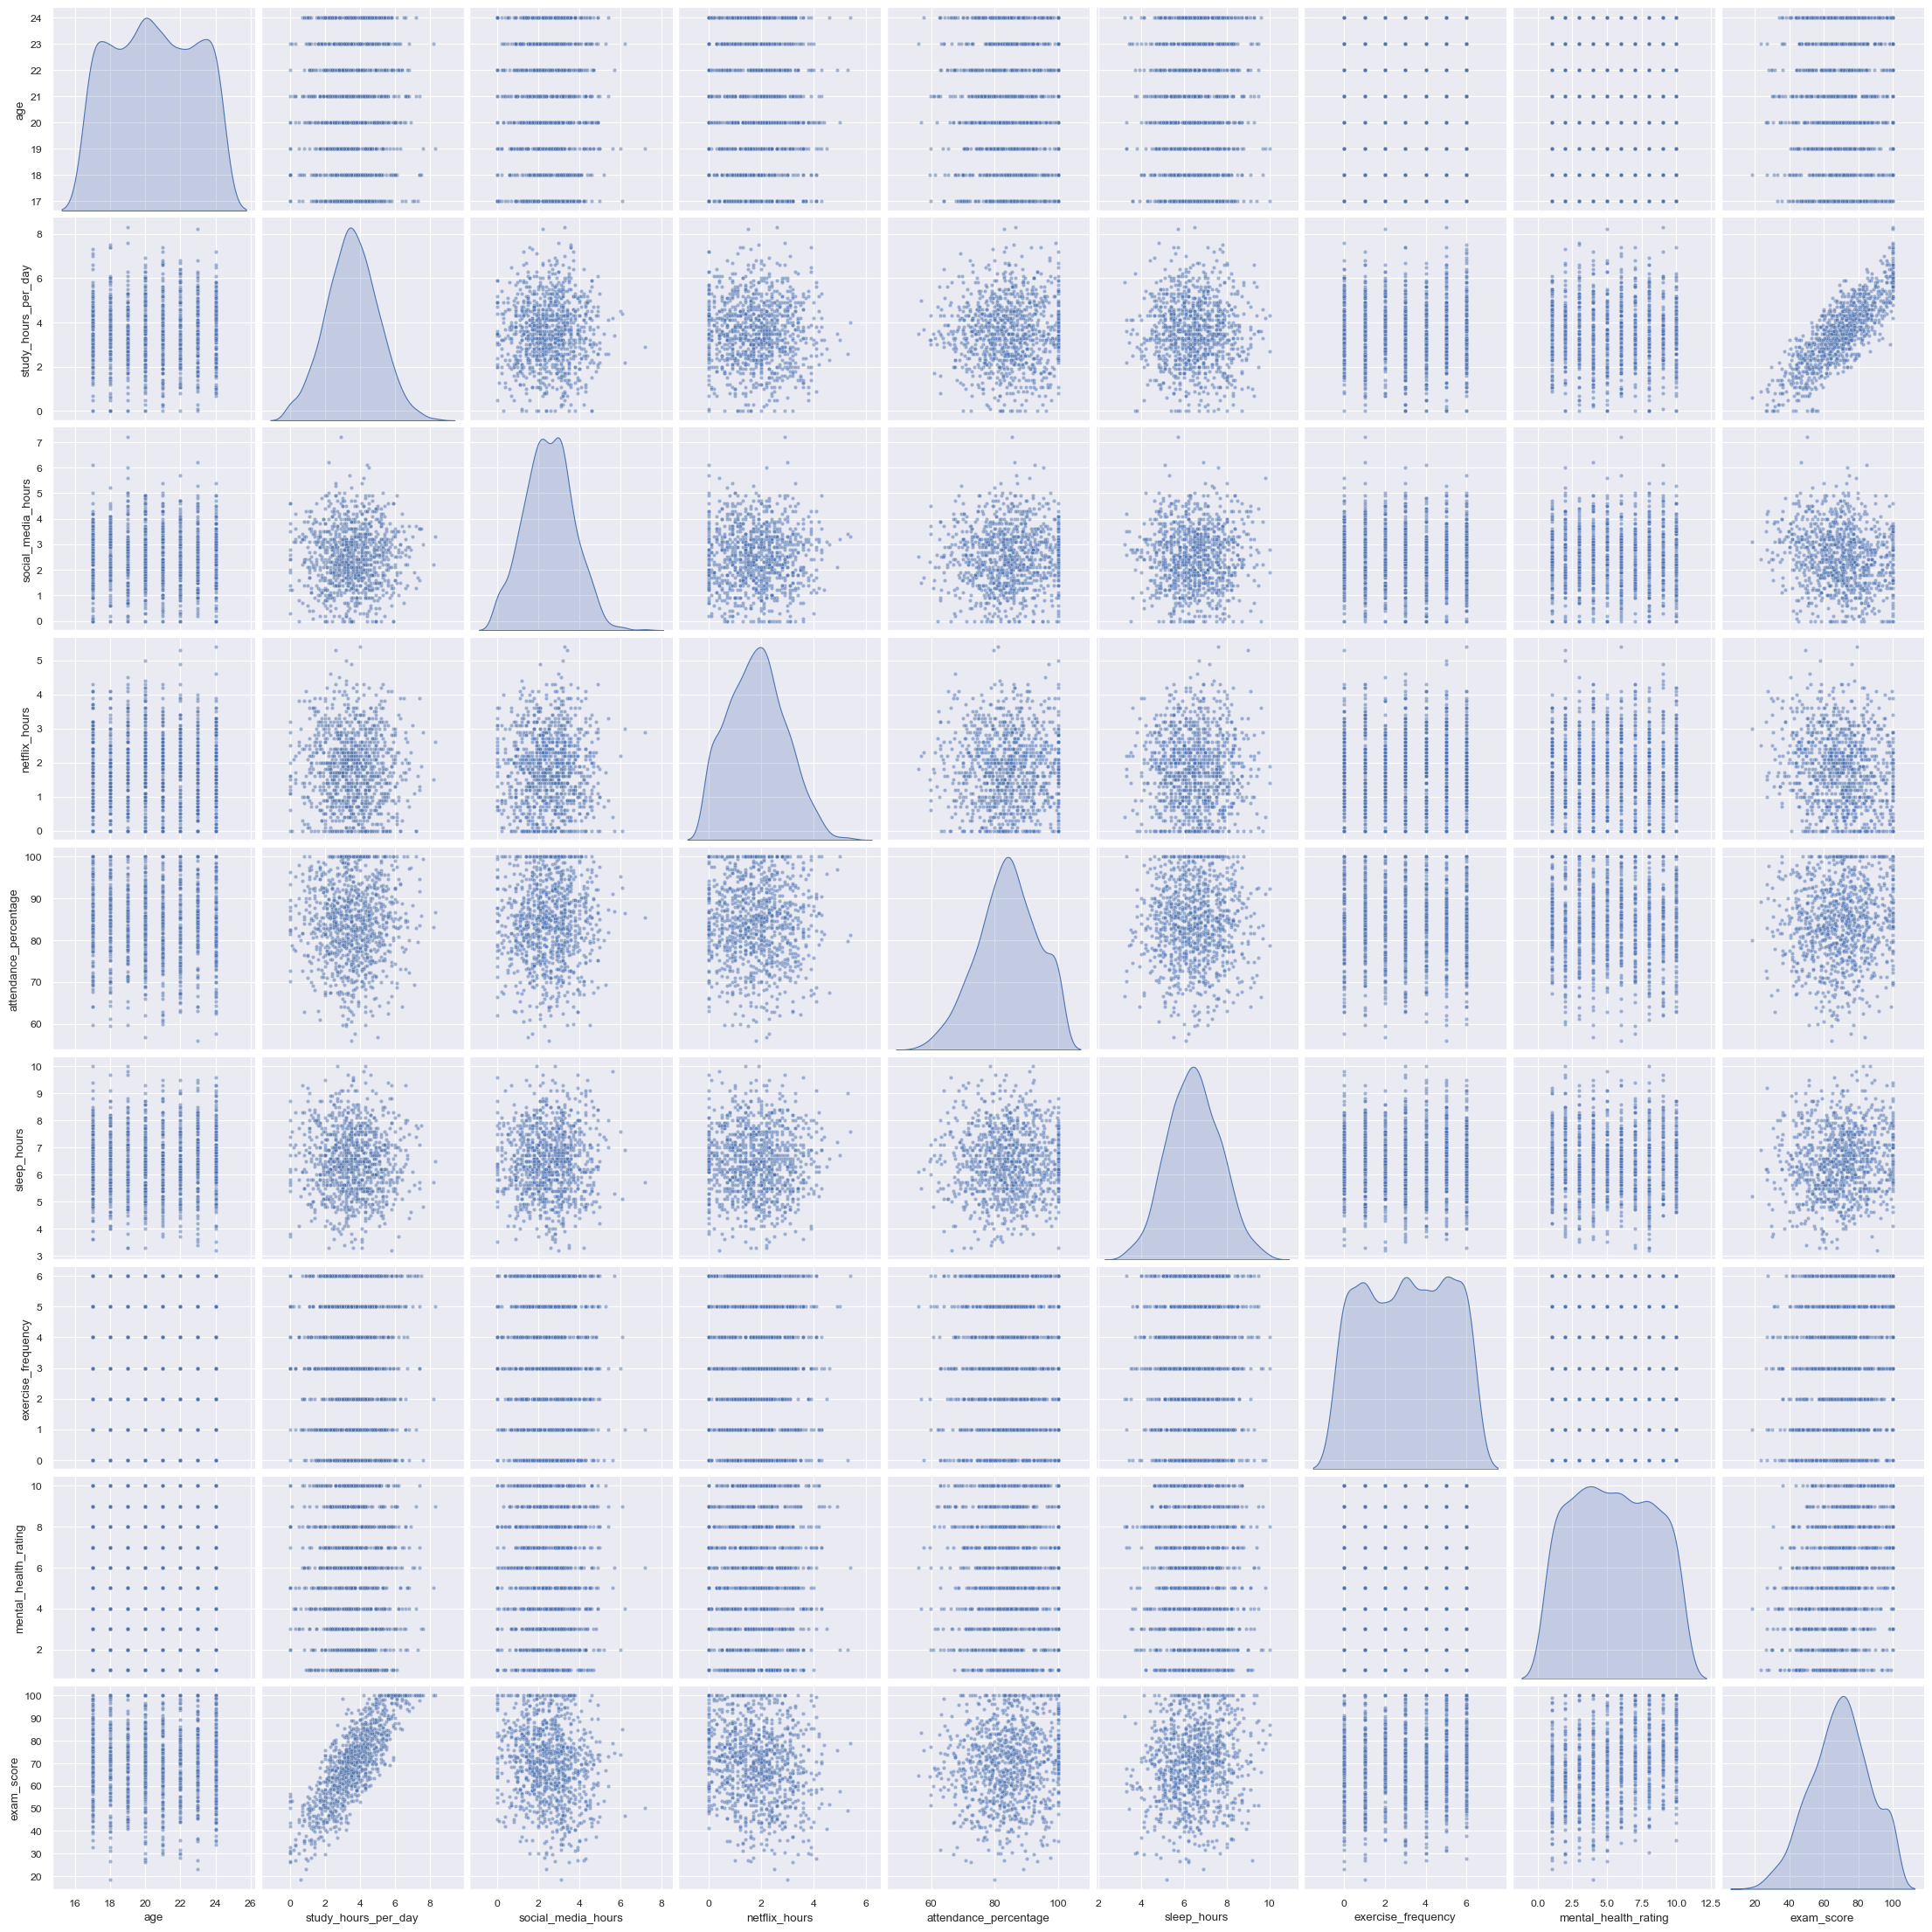

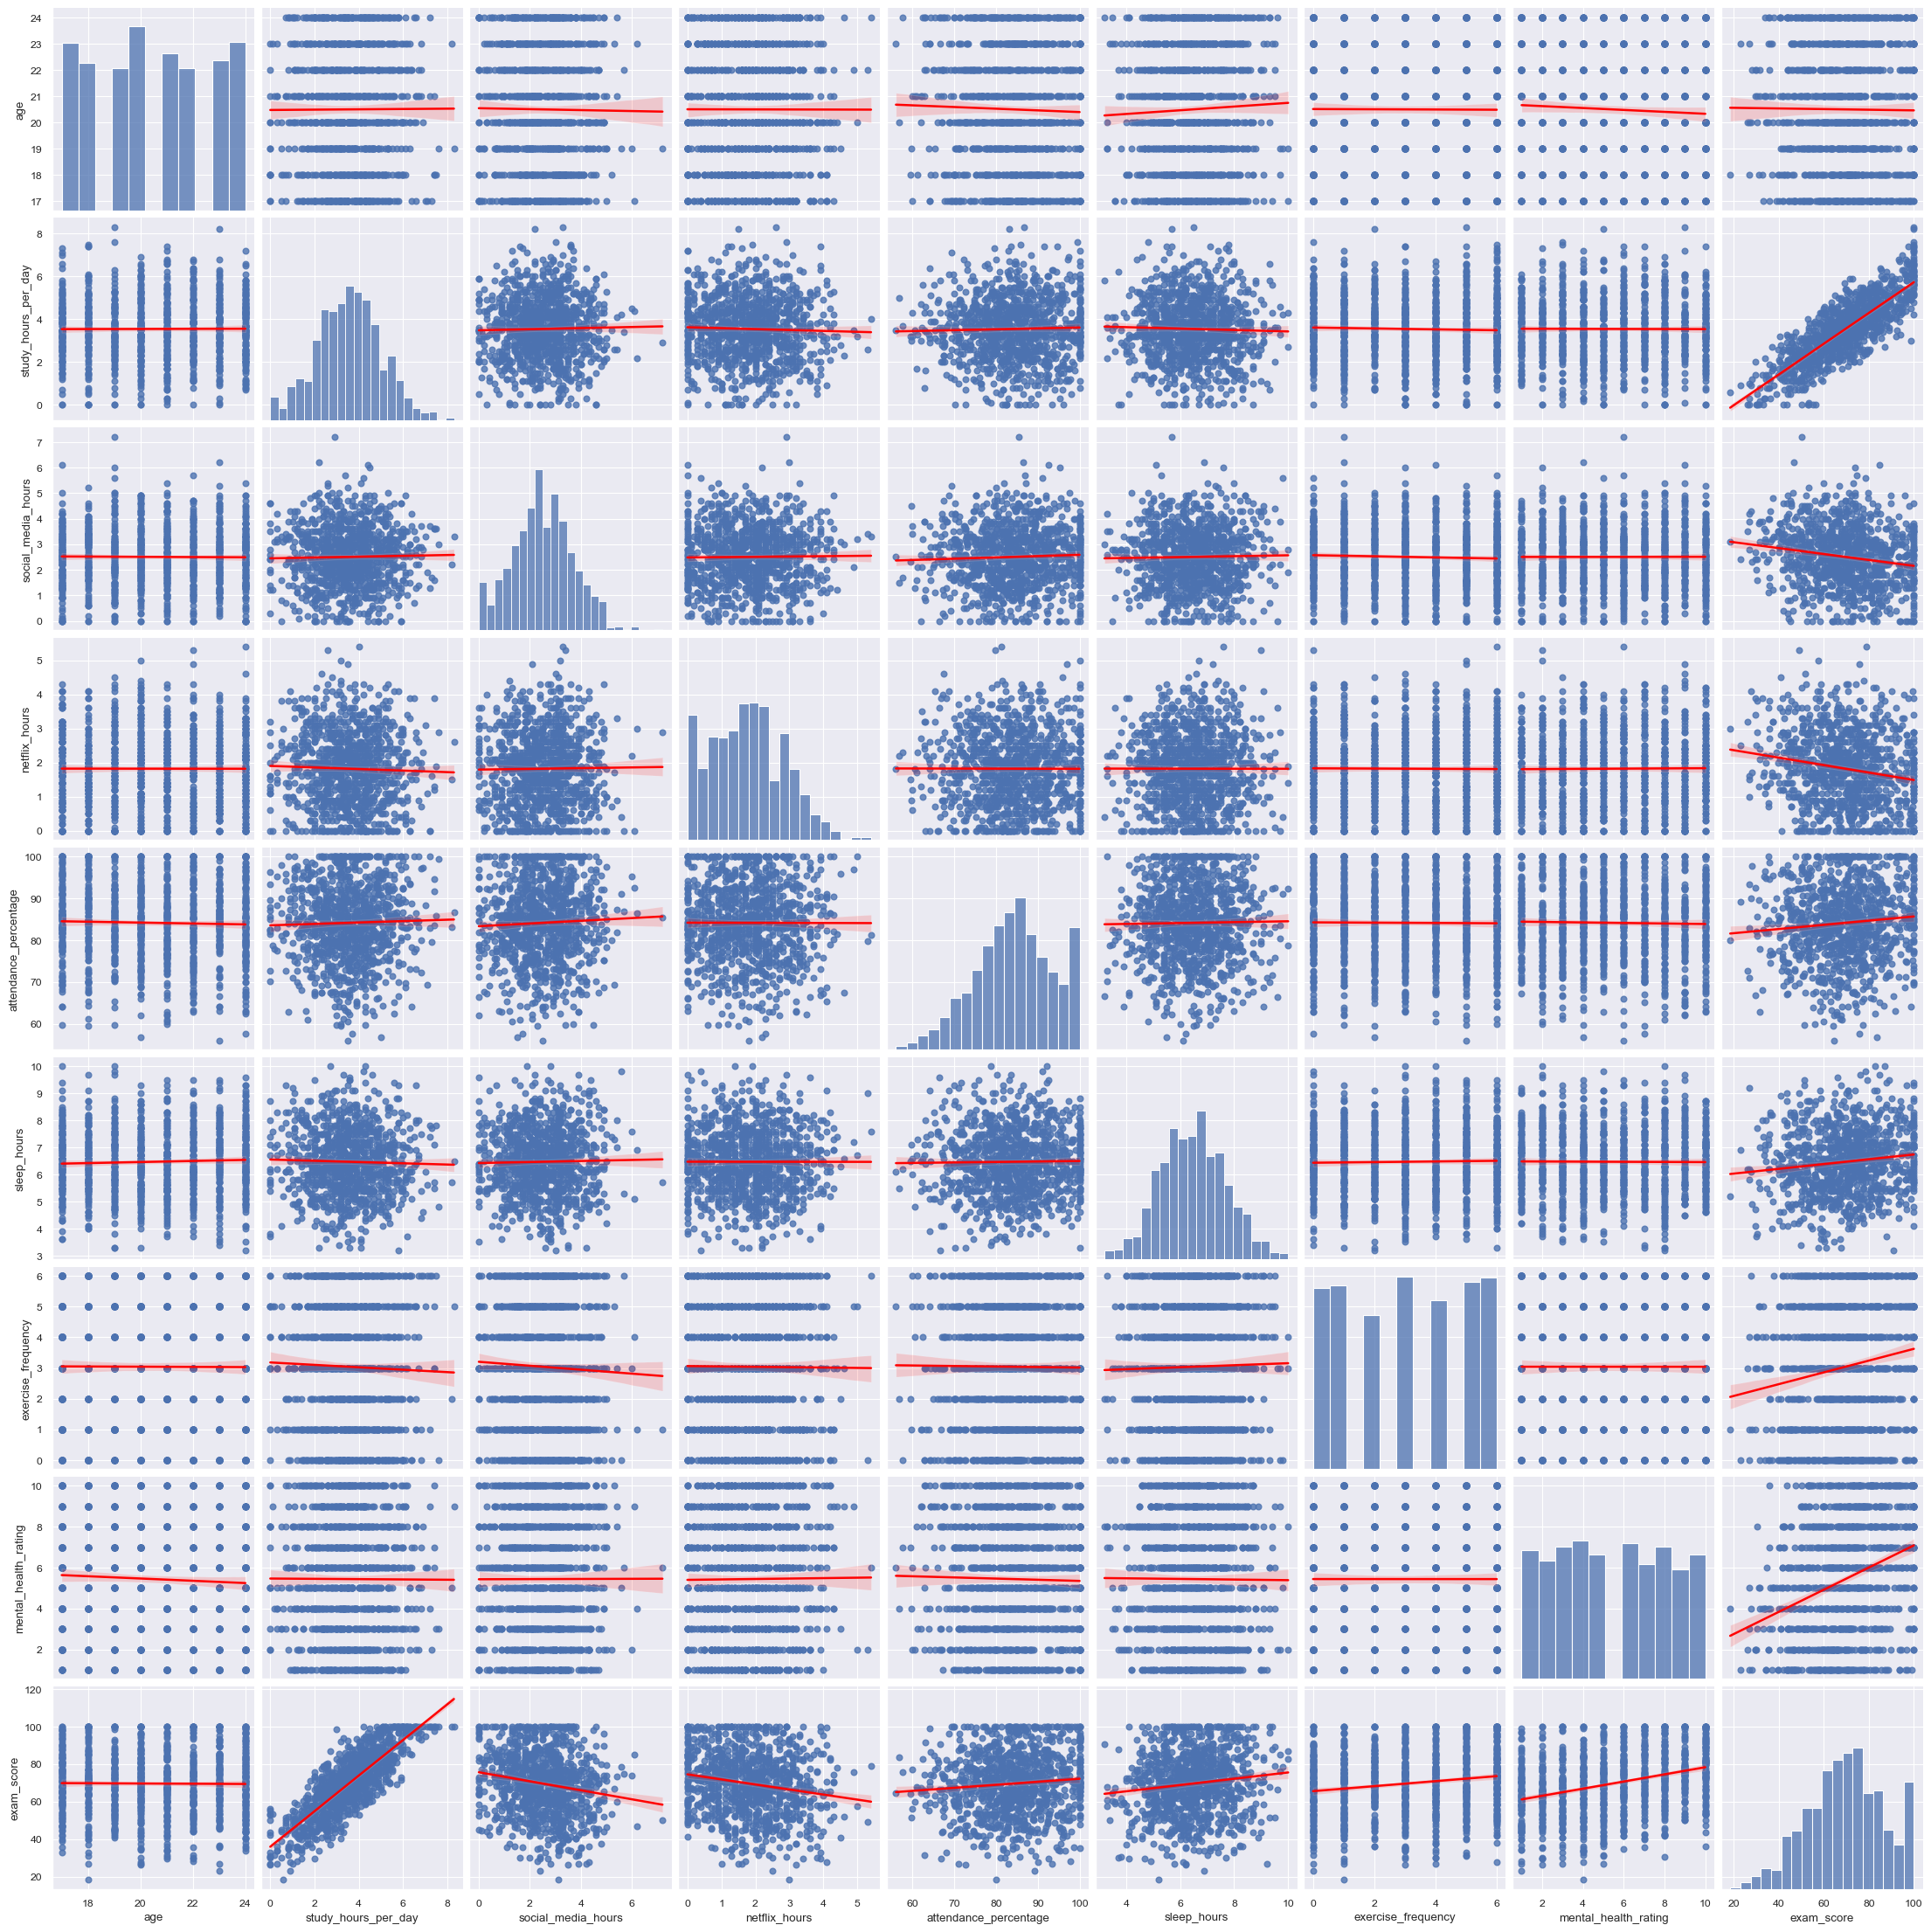

In [5]:
# create pairplot for numeric columns
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df_nums, diag_kind='kde', plot_kws={'alpha':0.5, 's':10})
plt.show()

sns.pairplot(df_nums, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

## Understanding the Categorical Data

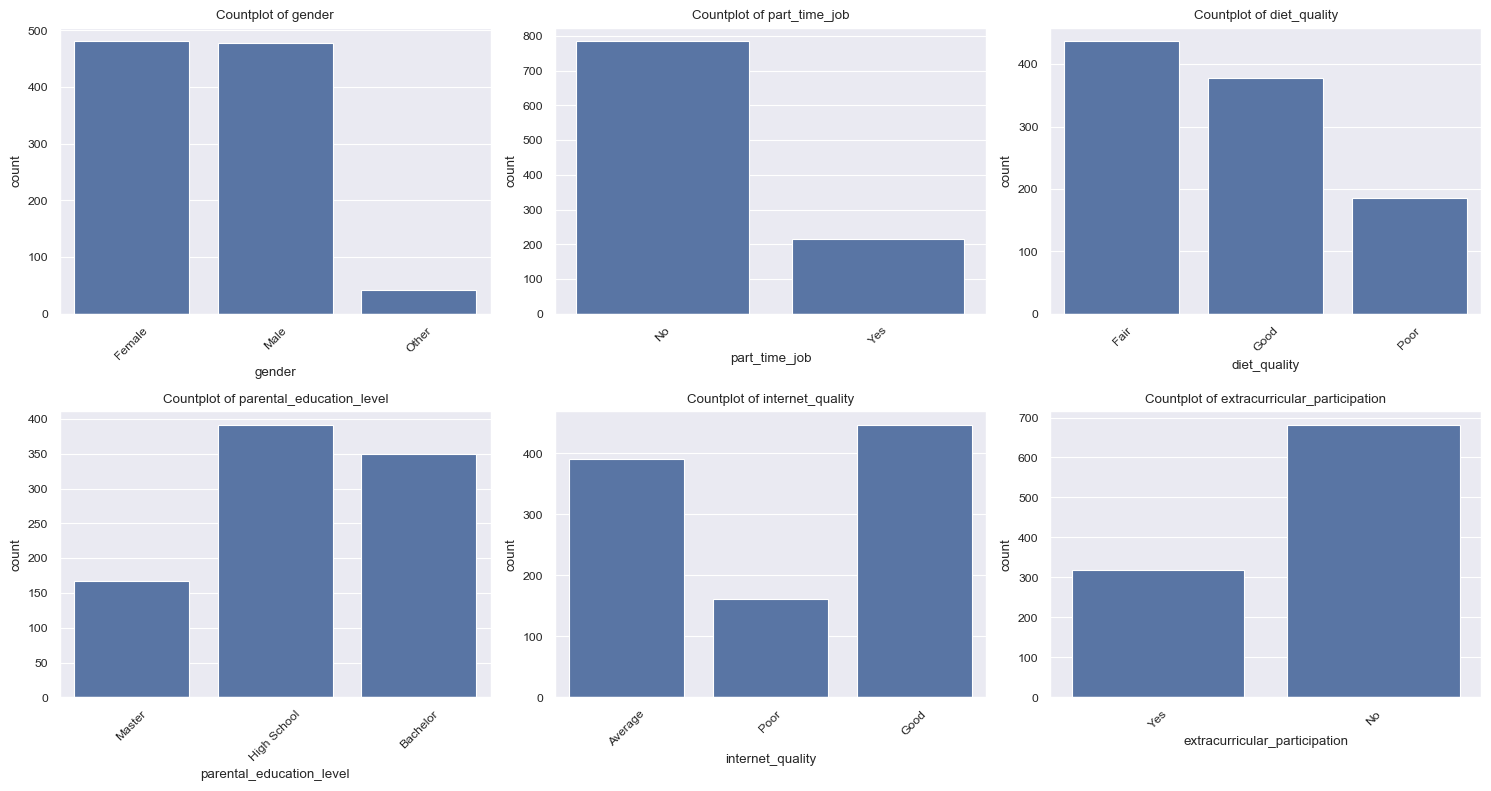

In [6]:

# Cateogrical Column Analysis
n_cols = 3
n_total = len(df_cats.columns)
n_rows = math.ceil(n_total/n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_cats.columns):
    sns.countplot(data=df_cats, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for ax in axes[n_total:]:
    ax.set_visible(False)  # Hide any unused subplots

plt.tight_layout()
plt.show()

## Discovering Numerical/Categorical Relationships

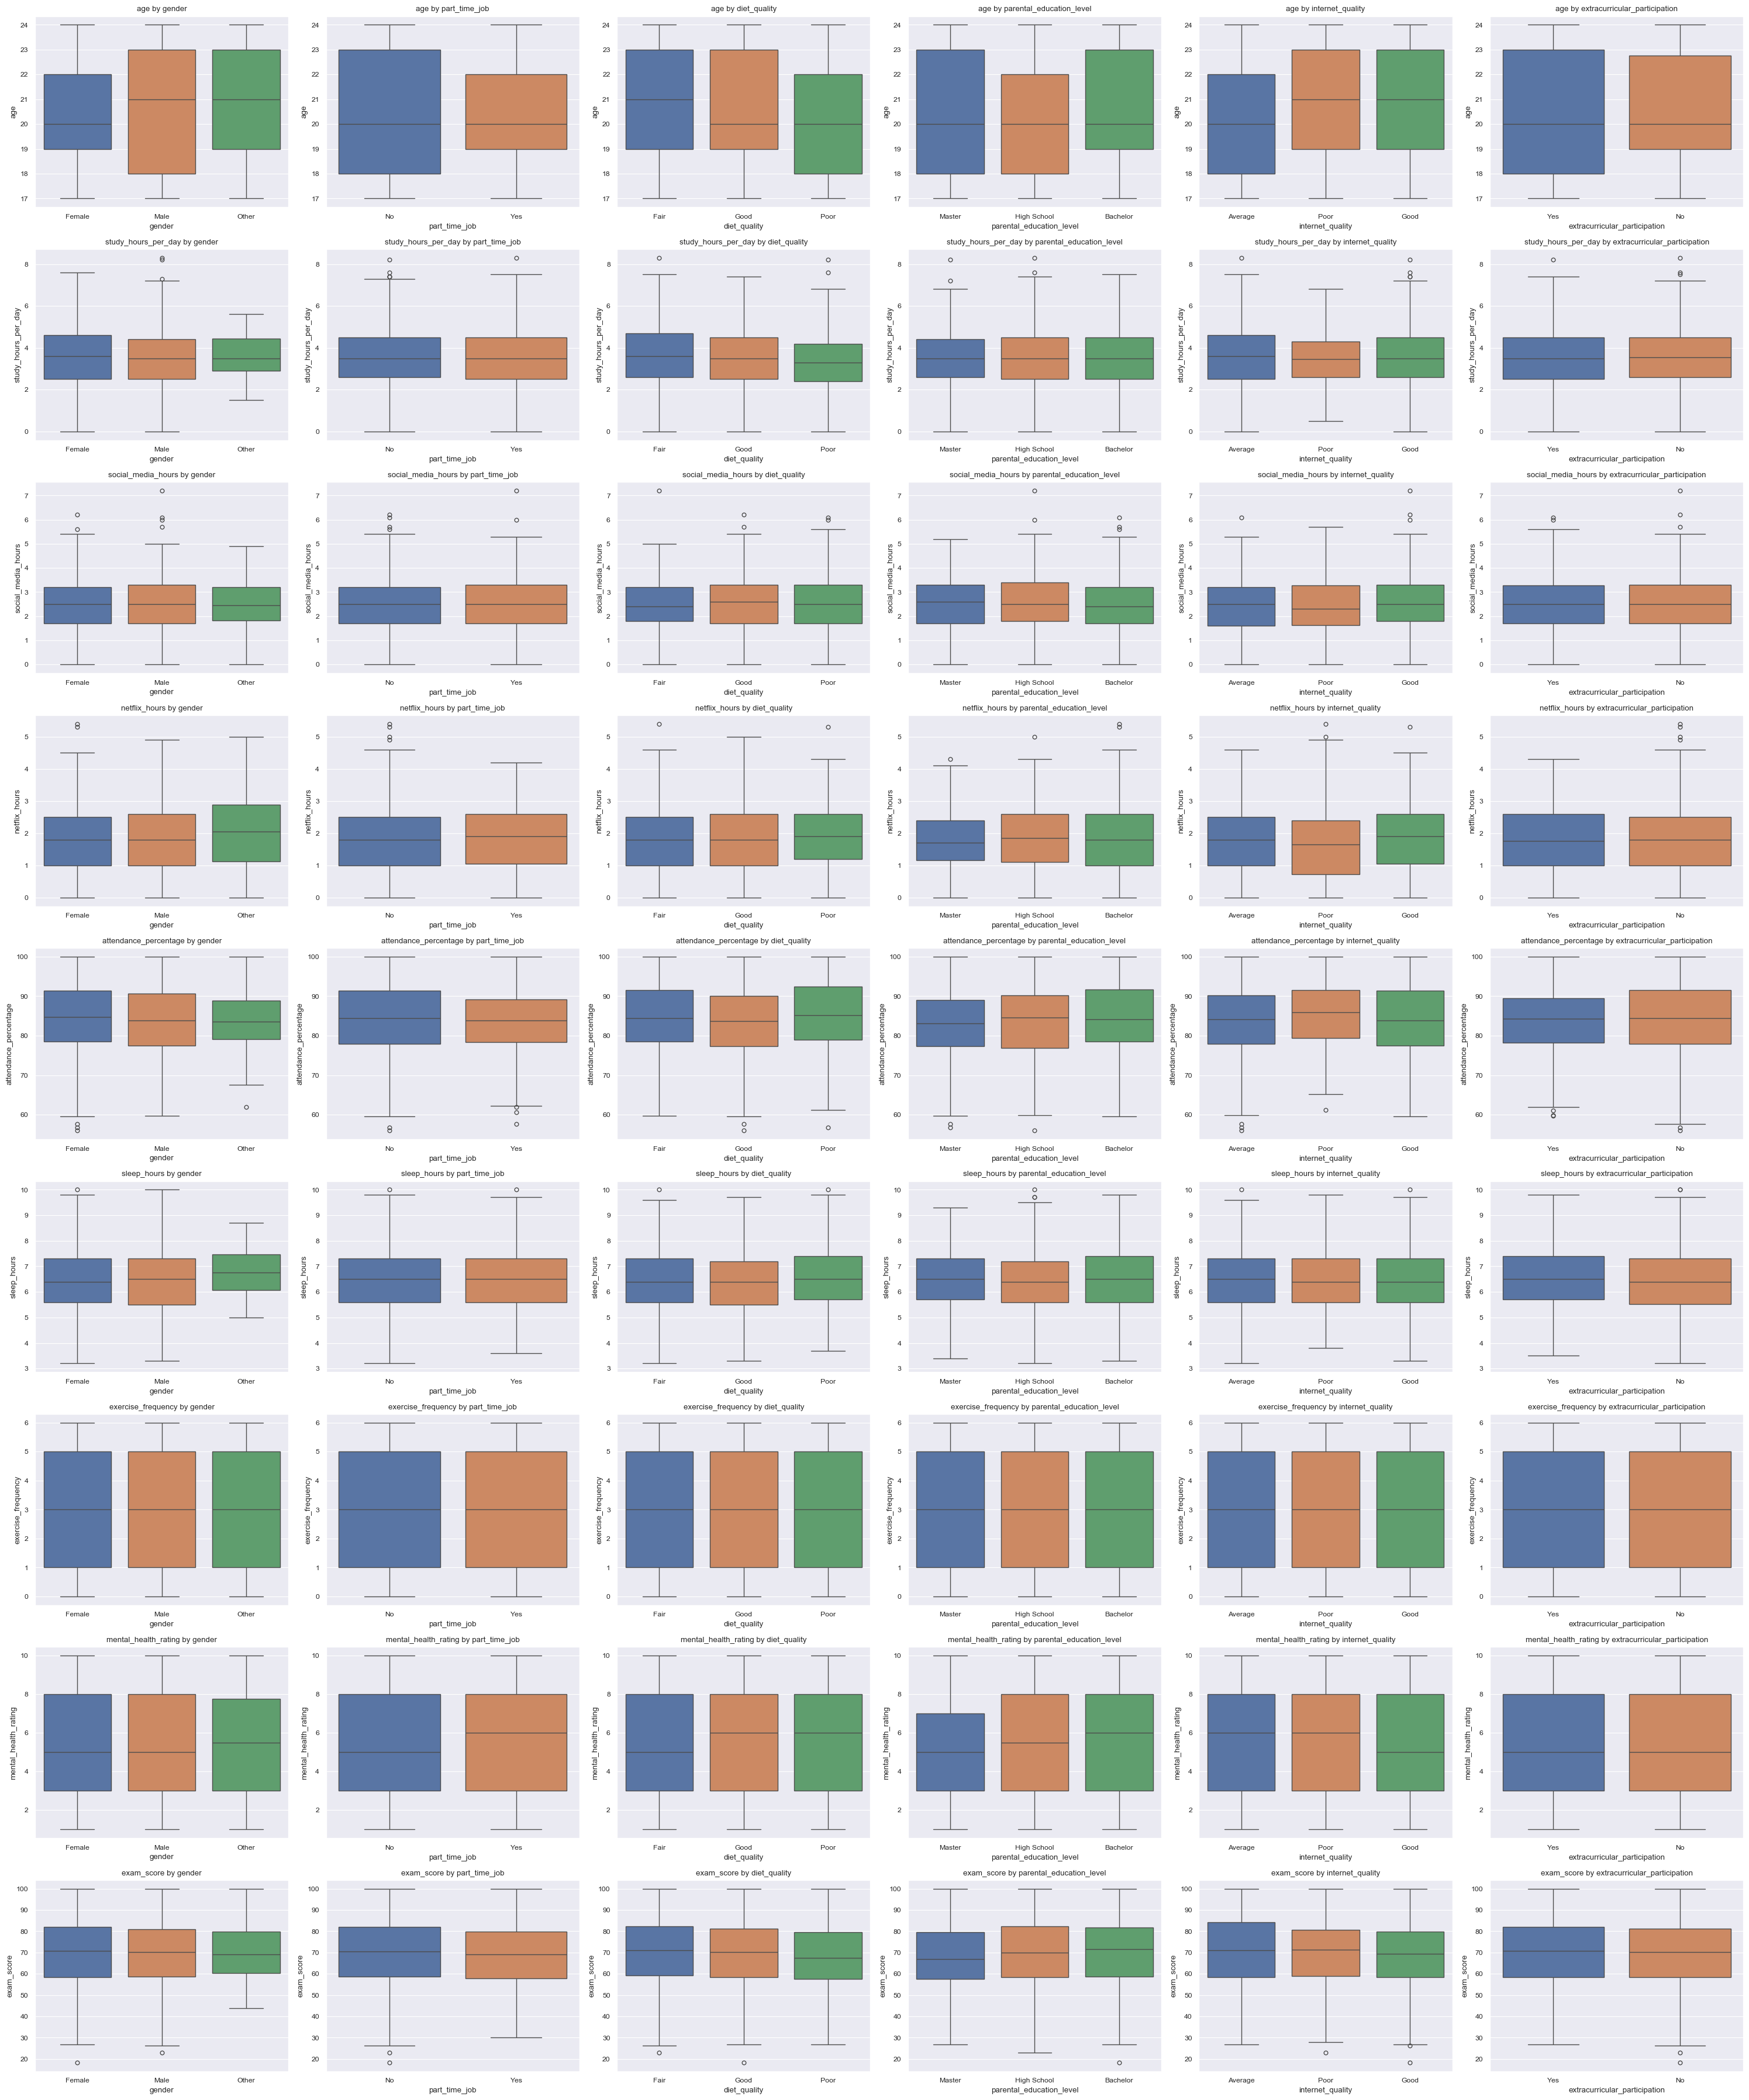

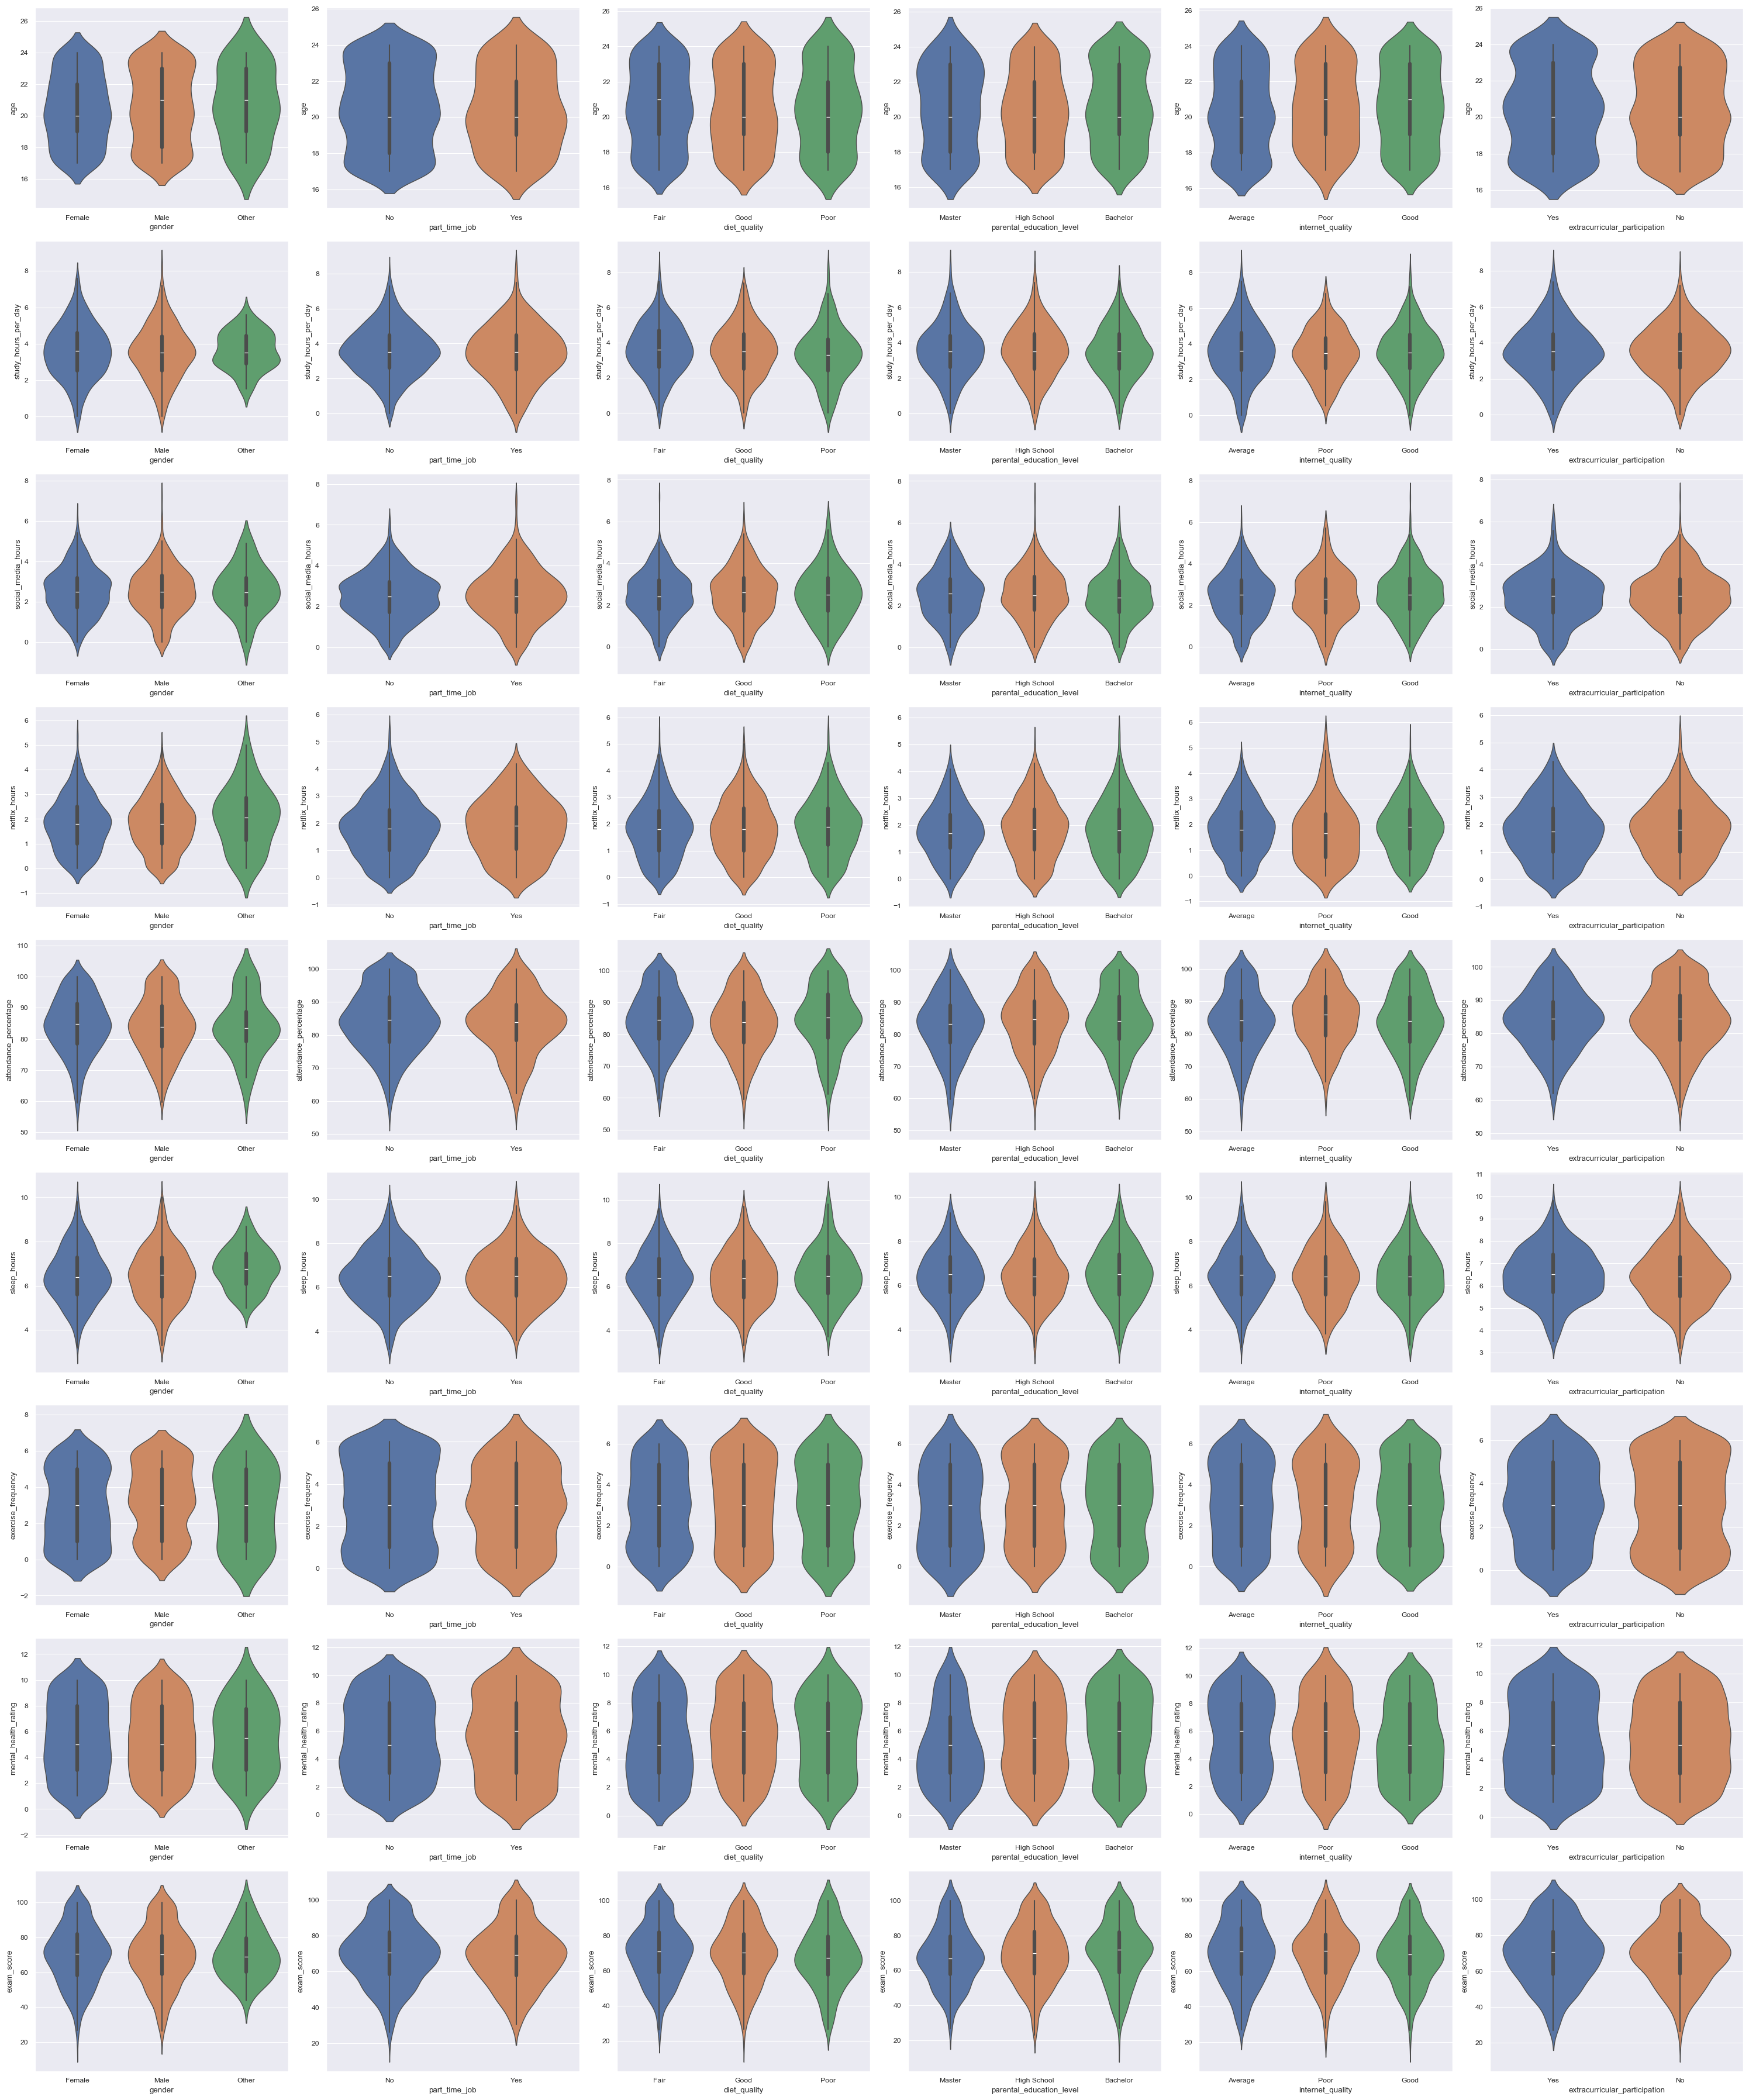

In [7]:

num_cols = df_nums.columns
cat_cols = df_cats.columns

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5*len(cat_cols), 4*len(num_cols)))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        sns.boxplot(x=df[cat], y=df[num], hue=df[cat], ax=ax, legend=False)
        ax.set_title(f"{num} by {cat}")
        ax.set_xlabel(cat)
        ax.set_ylabel(num)
        

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5*len(cat_cols), 4*len(num_cols)))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.violinplot(x=df[cat], y=df[num], hue=df[cat], ax=axes[i, j], legend=False)
        
        
        
plt.tight_layout()
plt.show()